In [13]:
__file__ = 'A1.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP4_lib")
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up
from uncertainties import ufloat
import scipy.constants as const
import scipy.fft as fft
from uncertainties import wrap

In [3]:
with open('Data/Aufgabe_3.txt','r') as tf:
    data = np.genfromtxt(tf).T
with open('Res/cp-cal_res.txt','r') as tf:
    cal = np.genfromtxt(tf).T
with open('Data/counts.txt','r') as tf:
    counts = np.genfromtxt(tf).T

data = f.channel_to_pos(data,cal)

In [4]:
xerr = 0.005

von 4.255
bis 5.868

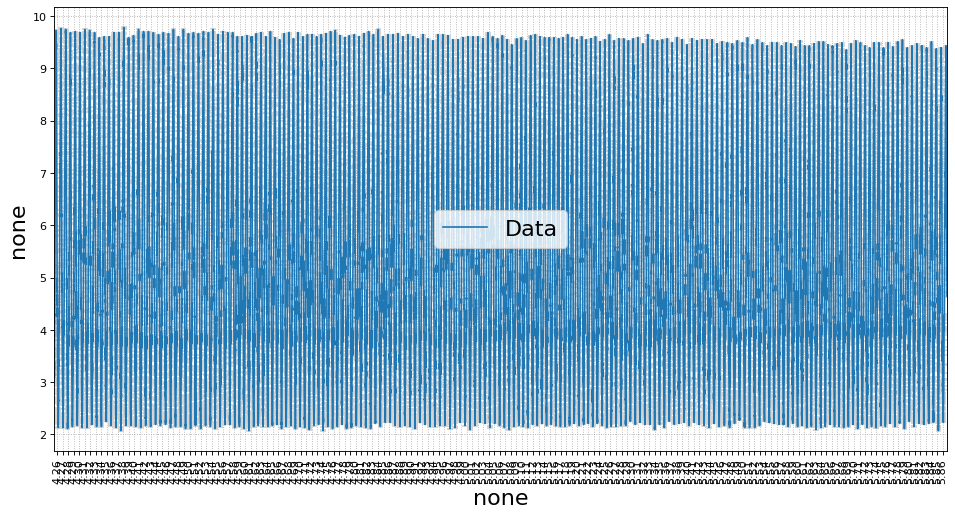

0.0012903333856597225


In [12]:
f.figsize(2)
#fig = plt.figure(figsize=(24,9),dpi=100,linewidth=50)
plt.errorbar(data[0],data[1],xerr=xerr,label = 'Data',ecolor='lightgray')
plt.xticks(np.arange(4.2,5.9,0.01),rotation = 90)
f.form([4.255,5.868])
#f.form([4.4,5])
print(np.mean(np.abs(data[2])))

In [20]:
def lam(von,bis,peaks):
    dist = (((ufloat(bis,0.005)-ufloat(von,0.005))*10**-3)*2)/5
    return dist/peaks


In [25]:

lengths = []
for i in range(len(counts[0])):
    lengths.append(lam(counts[0,i],counts[1,i],counts[2,i]))

print(sum(lengths)/len(lengths))
print(3.391e-6/(sum(lengths)/len(lengths)))

(3.478+/-0.016)e-06
0.975+/-0.004


Bestimmen des tatsächlichen hebelwertes

In [24]:
def lamneu(von,bis,peaks):
    return ((((ufloat(bis,0.005)-ufloat(von,0.005))*10**-3)*2)/3.391e-6)/peaks

hebel = []
for i in range(len(counts[0])):
    hebel.append(lamneu(counts[0,i],counts[1,i],counts[2,i]))
print((sum(hebel)/len(hebel)).format(':1.5'))



5.1279+/-0.0234
